# Gabriella Rivera
# John Vincent Deniega

In [1]:
import FlowCal
import flowio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

Run the below cell as code instead of markdown in order to rename files removing white space.

import os

### Define relative path to FCS folder via user's home directory
home_dir = os.path.expanduser("~")
folder_path = os.path.join(home_dir, "Desktop", "usd_ADS", "ADS599", "Notebook", "FlowRepository_FR-FCM-Z32U_files")

### Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Directory not found: {folder_path}")
else:
    # Iterate through all files in the given folder
    for filename in os.listdir(folder_path):
        # Join path and individual filename
        old_file_path = os.path.join(folder_path, filename)
        
        # Check if it is a file
        if os.path.isfile(old_file_path):
            # Replace spaces with underscores to avoid coding errors
            new_filename = filename.replace(" ", "_")
            new_file_path = os.path.join(folder_path, new_filename)
            
            # Rename the file with underscores
            os.rename(old_file_path, new_file_path)
            print(f"Renamed '{filename}' to '{new_filename}'")

| Marker | Fluorochrome |
|--------|--------------|
| CD45RA | Ax700 |
| HLA-DR | BV786 |
| CD3 | APC-H7 |
| CD20 | BUV805 |
| CD19 | PE-Cy5 |
| CD14 | BV510 |
| CD123 | BB660 |
| CD11c | APC |

## CADM1 FITC Test

In [2]:
# Define the paths dynamically
home_dir = os.path.expanduser("~")
# Change the words after home_dir to reflect your local location/directories for the FCS files
fcs_folder = os.path.join(home_dir, 
                          "Desktop", 
                          "usd_ADS", 
                          "ADS599", 
                          "Notebook", 
                          "FlowRepository_FR-FCM-Z32U_files")
fcs_file = "Comp_CADM1_FITC_D2_D02_012.fcs" # Test instance of an FCS file in the folder

# Combine for full path
file_path = os.path.join(fcs_folder, fcs_file)

# Load the FCS data into object and print
s = FlowCal.io.FCSData(file_path)

In [3]:
s[:3]

FCSData([[ 3.15035430e+04,  3.34625391e+04,  3.12494995e+03,
           1.09415869e+04,  5.45711060e+02,  2.38198929e+02,
           1.09296906e+02,  1.25232630e+01,  1.79159012e+02,
           4.64346008e+02,  2.26655212e+02,  1.51446243e+02,
           2.48909111e+01,  1.28595457e+01, -1.72899401e+00,
          -9.25848389e+00,  2.07025711e+02,  5.62349243e+01,
           2.54767014e+02,  2.31491684e+02,  1.27558794e+01,
          -2.48829689e+01,  6.84096479e+00,  1.88843746e+01,
          -7.46806812e+00, -6.02076769e+00,  1.99886200e+02,
           4.30685654e+01,  5.52062273e-01,  4.34756804e+00,
           3.38142633e+00,  5.87200047e-03],
         [ 3.56520820e+04,  3.77054961e+04,  3.64067236e+03,
           1.28165576e+04,  6.05351074e+02,  2.81205841e+02,
           1.31921799e+02,  2.32359333e+01,  2.76197998e+02,
           6.11943604e+02,  3.08346252e+02,  1.50466171e+02,
           4.64081001e+01,  2.37029171e+00,  3.00475979e+01,
           9.95562840e+00,  1.60802338e+

In [4]:
print("Shape: ", s.shape, "\n")
print("Channels: ", s.channels)

# Because S is a FlowCal.io.FCSData object, convert for easier data handling
s_np = np.array(s).astype('<f4') # Convert to little-endian NumPy array
fsc_a_data = s_np[:, 0] # Extract FSC-A data as it is in the 0th place

print("\nFirst 10 events in FITC-A channel:")
print(", ".join([f'{x:.2f}' for x in fsc_a_data[:10]])) # Truncate to 2 decimal places

mean_fsc_a = np.mean(fsc_a_data)
std_fsc_a = np.std(fsc_a_data)
print(f'\nFSC-A Mean: {mean_fsc_a:.2f}\nFSC-A Std Dev: {std_fsc_a:.2f}')

Shape:  (20000, 32) 

Channels:  ('FSC-A', 'FSC-H', 'SSC-A', 'B515-A', 'B610-A', 'B660-A', 'B710-A', 'B780-A', 'V450-A', 'V510-A', 'V570-A', 'V605-A', 'V655-A', 'V710-A', 'V750-A', 'V785-A', 'U390-A', 'U450-A', 'U500-A', 'U570-A', 'U660-A', 'U740-A', 'U785-A', 'R670-A', 'R730-A', 'R780-A', 'G575-A', 'G610-A', 'G660-A', 'G710-A', 'G780-A', 'Time')

First 10 events in FITC-A channel:
31503.54, 35652.08, 32035.37, 33674.53, 32198.94, 36507.20, 33340.48, 31283.46, 33443.36, 34430.05

FSC-A Mean: 33746.41
FSC-A Std Dev: 6609.38


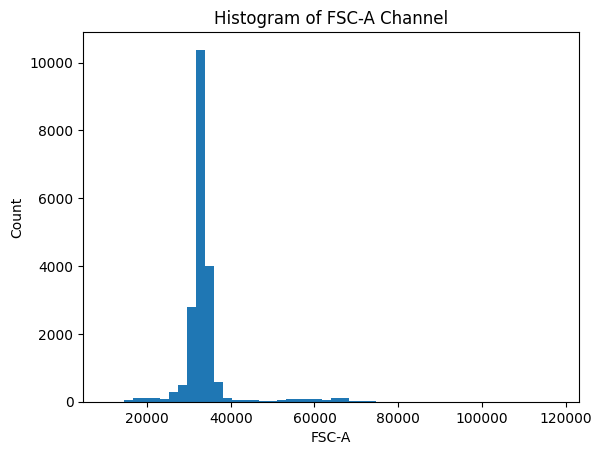

In [5]:
# Extract data for the specific channel
channel_data = s[:, 'FSC-A']

# Plot histogram using matplotlib
plt.hist(channel_data, bins=50)
plt.xlabel('FSC-A')
plt.ylabel('Count')
plt.title('Histogram of FSC-A Channel')
plt.show()



## PBMC Test

In [6]:
# Define the paths dynamically
home_dir = os.path.expanduser("~")
# Change the words after home_dir to reflect your local location/directories for the FCS files
fcs_folder = os.path.join(home_dir, 
                          "Desktop", 
                          "usd_ADS", 
                          "ADS599", 
                          "Notebook", 
                          "FlowRepository_FR-FCM-Z32U_files")
pbmc_file = "PBMC_090120_1_DCs_A5_A05_031.fcs" # Test instance of an PBMC FCS file in the folder

# Combine for full path
pbmc_path = os.path.join(fcs_folder, pbmc_file)

# Load the FCS data into object and print
pbmc = FlowCal.io.FCSData(pbmc_path)

In [7]:
print("Shape: ", pbmc.shape, "\n")
print("Channels: ", pbmc.channels)

# Because S is a FlowCal.io.FCSData object, convert for easier data handling
pbmc_np = np.array(pbmc).astype('<f4') # Convert to little-endian NumPy array
fsc_a_data = pbmc_np[:, 0] # Extract FSC-A data as it is in the 0th place

print("\nFirst 10 events in FITC-A channel:")
print(", ".join([f'{x:.2f}' for x in fsc_a_data[:10]])) # Truncate to 2 decimal places

mean_fsc_a = np.mean(fsc_a_data)
std_fsc_a = np.std(fsc_a_data)
print(f'\nFSC-A Mean: {mean_fsc_a:.2f}\nFSC-A Std Dev: {std_fsc_a:.2f}')

Shape:  (2088689, 32) 

Channels:  ('FSC-A', 'FSC-H', 'SSC-A', 'B515-A', 'B610-A', 'B660-A', 'B710-A', 'B780-A', 'V450-A', 'V510-A', 'V570-A', 'V605-A', 'V655-A', 'V710-A', 'V750-A', 'V785-A', 'U390-A', 'U450-A', 'U500-A', 'U570-A', 'U660-A', 'U740-A', 'U785-A', 'R670-A', 'R730-A', 'R780-A', 'G575-A', 'G610-A', 'G660-A', 'G710-A', 'G780-A', 'Time')

First 10 events in FITC-A channel:
87361.88, 126908.38, 80773.44, 98579.29, 81687.25, 39737.04, 92495.29, 135816.33, 98502.38, 79709.81

FSC-A Mean: 83295.86
FSC-A Std Dev: 285028.12


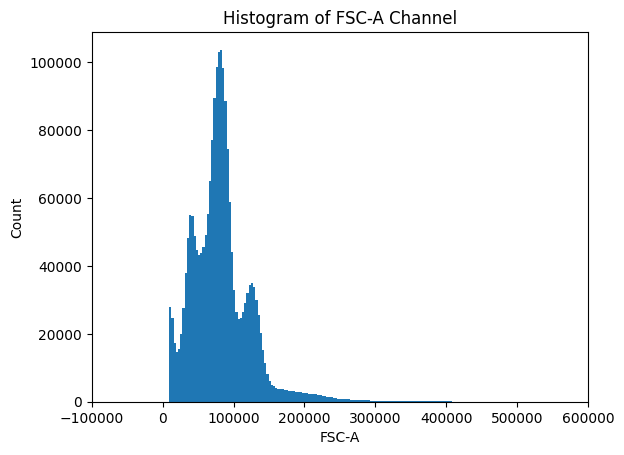

In [8]:
# Extract data for the specific channel
channel_data = pbmc[:, 'FSC-A']

# Plot histogram using matplotlib
plt.hist(channel_data, bins=100000)
plt.xlabel('FSC-A')
plt.ylabel('Count')
plt.title('Histogram of FSC-A Channel')
plt.xlim(-100000, 600000) 
plt.show()

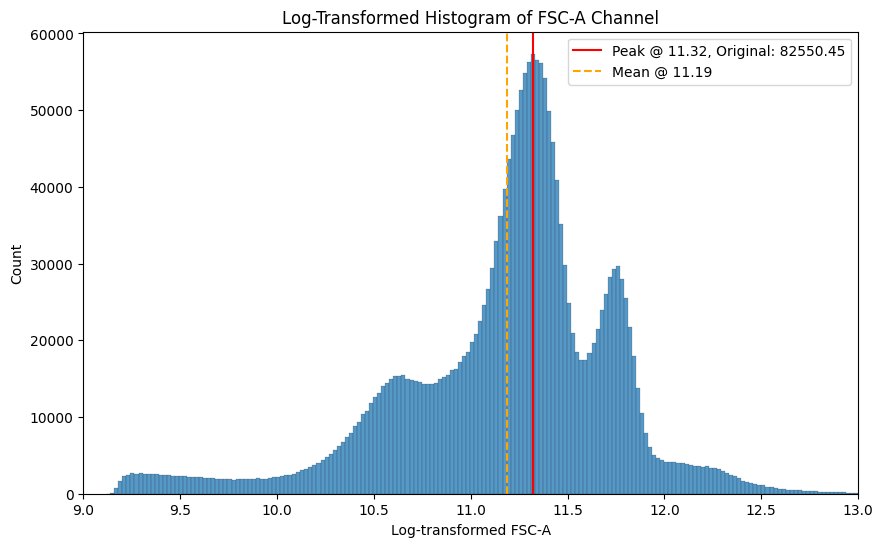

In [9]:
channel_data = pbmc[:, 'FSC-A'].astype('<f4')
channel_data = np.log1p(channel_data) # Optional: log-transform
plt.figure(figsize=(10,6))
sns.histplot(channel_data, bins=500, kde=False)
plt.xlabel('Log-transformed FSC-A')
plt.ylabel('Count')
plt.title('Log-Transformed Histogram of FSC-A Channel')

# Add a line at the peak
counts, bin_edges = np.histogram(channel_data, bins=500) # Gather histogram parameters
peak_bin = bin_edges[np.argmax(counts)] # Bin with the largest count
peak_value = peak_bin + (bin_edges[1] - bin_edges[0]) / 2 # Calculate the center of the largest bin
peak_original_value = np.expm1(peak_value) # Exponentiate to retrieve original value
plt.axvline(peak_value, 
            color='red', 
            linestyle='solid', 
            label=f'Peak @ {peak_value:.2f}, Original: {peak_original_value:.2f}')

# Add vertical line with mean
mean_fsc_a = np.mean(channel_data)
plt.axvline(mean_fsc_a, color='orange', linestyle='--', label=f'Mean @ {mean_fsc_a:.2f}')
plt.legend()
plt.xlim(9, 13) # Adjusting for visibility
plt.show()

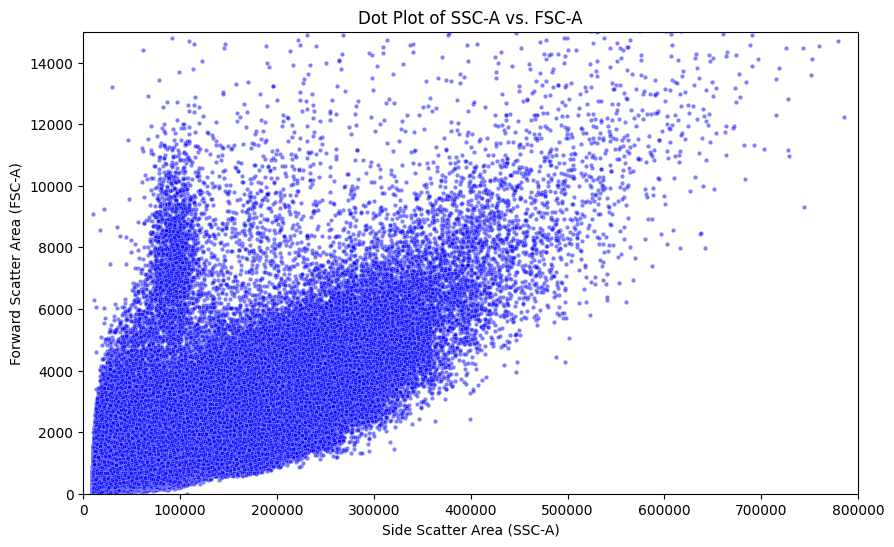

In [10]:
fsc_a = pbmc[:, 'FSC-A'].astype('<f4') # Small-endian for conversion error
ssc_a = pbmc[:, 'SSC-A'].astype('<f4')
data = pd.DataFrame({
    'FSC-A': fsc_a, 
    'SSC-A': ssc_a})

plt.figure(figsize=(10,6))
sns.scatterplot(x='FSC-A', y='SSC-A', data=data, s=10, alpha=0.5, color='blue')
plt.xlabel('Side Scatter Area (SSC-A)')
plt.ylabel('Forward Scatter Area (FSC-A)')
plt.title('Dot Plot of SSC-A vs. FSC-A')
plt.xlim(0, 800000)
plt.ylim(0, 15000) 
plt.show()